In [5]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,mi1,mi2,F1, F2, w1, w2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, mi1, mi2 ,F1, F2, w1, w2= p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + mi1 * (x1 - L1)**3 + k2 * (x2 - x1 - L2) - mi2 * (x2 - x1 - L2)**3 + F1*np.cos(w1*t)) / m1 ,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + mi2 * (x2 - x1 - L2)**3 + F2*np.cos(w2*t)) / m2]
    return f

In [17]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
import math

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2/5
k2 = 1
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 1/10
b2 = 1/5
# Nonlinear coefficients
mi1=1/6
mi2=1/10

#Fuerzas iniciales
F1=1/3
F2=1/5

#Frecuencias iniciales
w1=1
w2=3/5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0
x2 = 0.1
y2 = 0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 250
numpoints = 2000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mi1, mi2, F1, F2, w1, w2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('Ejemplo4_2.dat', 'w') as E42:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=E42)

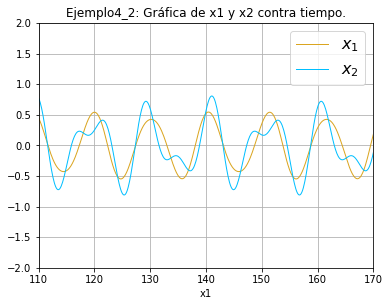

In [29]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim, ylim
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo4_2.dat', unpack=True, skiprows=880)

figure(1, figsize=(6, 4.5))

xlabel('x1')
grid(True)
lw = 1

plot(t, x1, 'goldenrod', linewidth=lw)
plot(t, x2, 'deepskyblue', linewidth=lw)
ylim(-2,2)
xlim(110,170)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Ejemplo4_2: Gráfica de x1 y x2 contra tiempo.')
savefig('Ejemplo4_2Posiciones1.png', dpi=100)

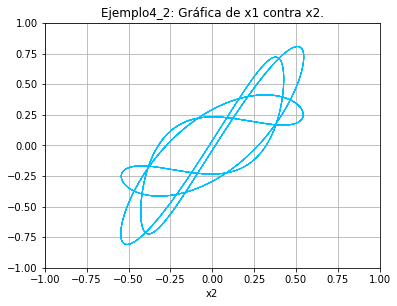

In [28]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim, ylim
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo4_2.dat', unpack=True, skiprows=880)

figure(1, figsize=(6, 4.5))

xlabel('x2')
grid(True)
lw = 1

plot(x1, x2, 'deepskyblue', linewidth=lw)
ylim(-1,1)
xlim(-1,1)

title('Ejemplo4_2: Gráfica de x1 contra x2.')
savefig('Ejemplo4_2Posiciones2.png', dpi=100)